### Name : Siddhi Sandip Kakani
###  Roll no :2447051
### Practical No : 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv('uber.csv')

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data = data.drop(columns=['Unnamed: 0', 'key'])

In [7]:
data = data.dropna()

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_year'] = data['pickup_datetime'].dt.year

In [9]:
data = data.drop(columns=['pickup_datetime'])

In [10]:
X = data.drop(columns=['fare_amount'])
y = data['fare_amount']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

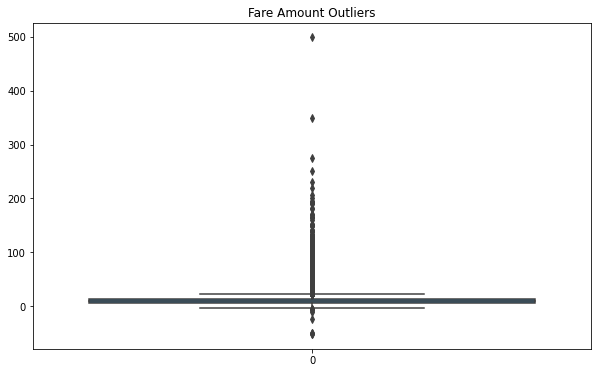

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['fare_amount'])
plt.title('Fare Amount Outliers')
plt.show()

In [15]:
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
data_filtered = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound)]


In [18]:
X = data_filtered.drop(columns=['fare_amount'])
y = data_filtered['fare_amount']

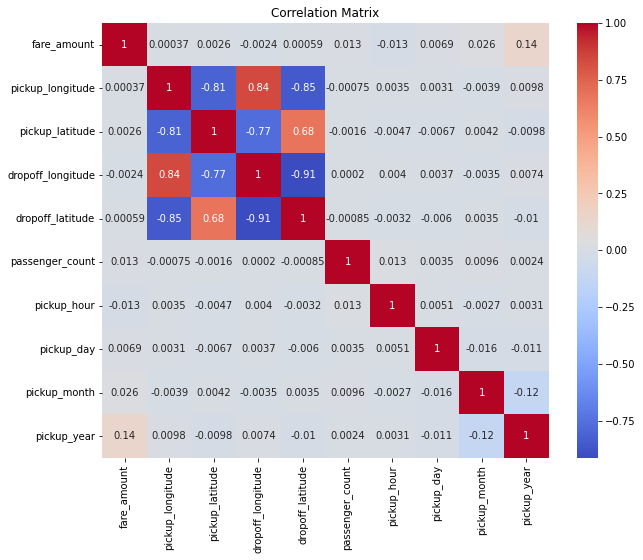

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = data_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [41]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [42]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [43]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [44]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

In [45]:
rmse_lin, r2_lin, mae_lin = evaluate_model(y_test, y_pred_lin)


In [46]:

rmse_ridge, r2_ridge, mae_ridge = evaluate_model(y_test, y_pred_ridge)

In [47]:
rmse_lasso, r2_lasso, mae_lasso = evaluate_model(y_test, y_pred_lasso)


In [48]:

print("Linear Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_lin, r2_lin, mae_lin))
print("Ridge Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_ridge, r2_ridge, mae_ridge))
print("Lasso Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_lasso, r2_lasso, mae_lasso))

Linear Regression: RMSE = 10.11, R2 = 0.02, MAE = 5.99
Ridge Regression: RMSE = 10.11, R2 = 0.02, MAE = 5.99
Lasso Regression: RMSE = 10.12, R2 = 0.02, MAE = 5.99
